### NOTES
- Exported data from zillow itself
- Has 820 records
- Limited price to 600,000 to avoid data from being too skewed and is range of house I am looking for. 
- Data is only for the Tarrant County Area


In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("Zillow_Properties_Houses_06_2025.csv")
df = df.drop(columns=["MLS ID", "State", "Country"]) # Drop Columns I will not need is not useful to me
df.head()

,Property URL,Listing description,Property type,Number of days on Zillow,Date listed (MM/DD/YYYY),Property price (USD),Living area,Living area unit,Price per living area unit (USD),Lot/land area,Lot/land area unit,Bedrooms,Bathrooms,Street address,City,Zip,Latitude,Longitude,Zestimate (USD)
0,https://www.zillow.com/homedetails/7525-Maple-...,House for sale,Single Family,3,06/21/2025,259900,1148,sqft,226.39,8263.33,sqft,3,2,7525 Maple Dr,North Richland Hills,76180,32.854603,-97.218960,253200.0
1,https://www.zillow.com/homedetails/5361-Brentl...,House for sale,Single Family,5,06/19/2025,285000,1550,sqft,183.87,5749.92,sqft,3,2,5361 Brentlawn Dr,Fort Worth,76179,32.859410,-97.404350,281800.0
2,https://www.zillow.com/homedetails/6524-Sherid...,House for sale,Single Family,4,06/20/2025,315000,2231,sqft,141.19,8189.28,sqft,4,3,6524 Sheridan Cir,Arlington,76017,32.662193,-97.210686,313900.0
3,https://www.zillow.com/homedetails/3905-Vernon...,House for sale,Single Family,5,06/19/2025,490000,3151,sqft,155.51,7187.40,sqft,4,3,3905 Vernon Way,Fort Worth,76244,32.910053,-97.301120,484200.0
4,https://www.zillow.com/homedetails/1039-Spring...,House for sale,Single Family,8,06/16/2025,270000,1394,sqft,193.69,6359.76,sqft,3,2,1039 Spring Hill Dr,Saginaw,76179,32.856403,-97.385040,264300.0


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      820 non-null    object 
 1   Listing description               820 non-null    object 
 2   Property type                     820 non-null    object 
 3   Number of days on Zillow          820 non-null    int64  
 4   Date listed (MM/DD/YYYY)          820 non-null    object 
 5   Property price (USD)              820 non-null    int64  
 6   Living area                       820 non-null    int64  
 7   Living area unit                  820 non-null    object 
 8   Price per living area unit (USD)  820 non-null    float64
 9   Lot/land area                     818 non-null    float64
 10  Lot/land area unit                818 non-null    object 
 11  Bedrooms                          820 non-null    int64  
 12  Bathroom

# Clean the Dataset

In [163]:
cleaned_df = df.dropna()
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 816
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property URL                      600 non-null    object 
 1   Listing description               600 non-null    object 
 2   Property type                     600 non-null    object 
 3   Number of days on Zillow          600 non-null    int64  
 4   Date listed (MM/DD/YYYY)          600 non-null    object 
 5   Property price (USD)              600 non-null    int64  
 6   Living area                       600 non-null    int64  
 7   Living area unit                  600 non-null    object 
 8   Price per living area unit (USD)  600 non-null    float64
 9   Lot/land area                     600 non-null    float64
 10  Lot/land area unit                600 non-null    object 
 11  Bedrooms                          600 non-null    int64  
 12  Bathrooms    

# Houses in each city

<Axes: xlabel='City'>

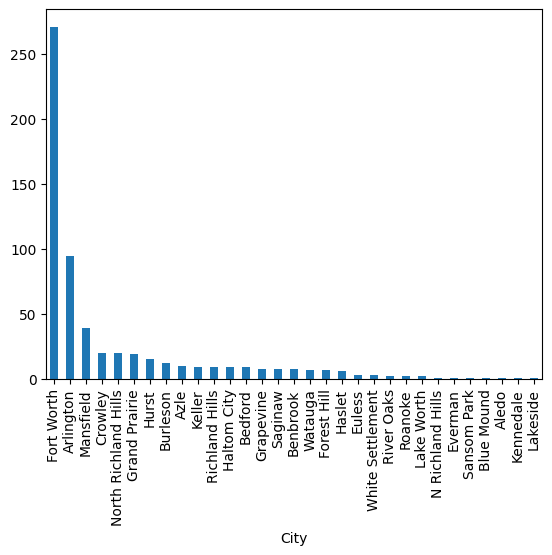

In [164]:
cleaned_df["City"].value_counts().plot(kind="bar")


# WILL NEED TO COMBINE SOME OF THE CITY TOGETHER SINCE THEY ARE DUPLICATE CITIES

# Distribution of SQFT 

<Axes: ylabel='Frequency'>

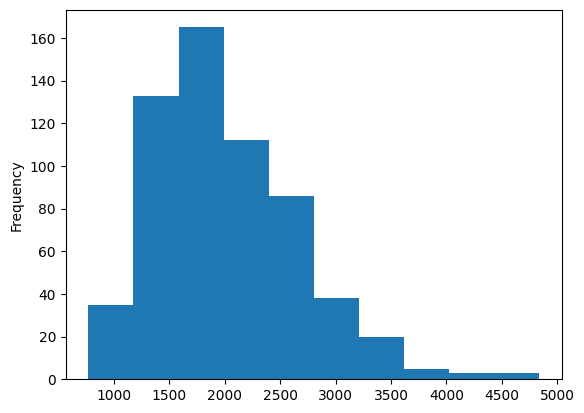

In [165]:
cleaned_df["Living area"].plot(kind="hist")

<Axes: xlabel='Living area'>

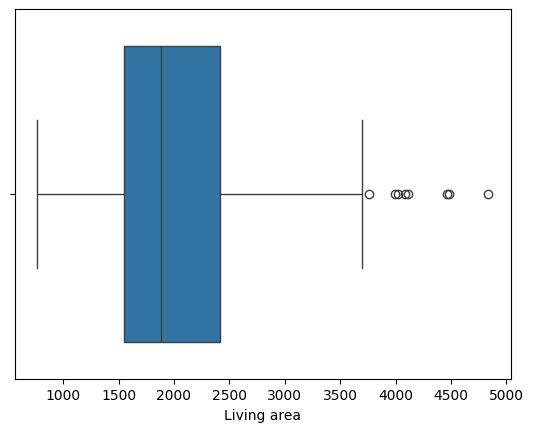

In [166]:
sns.boxplot(data=cleaned_df, x="Living area")

# Distribution of the House Prices

<Axes: ylabel='Frequency'>

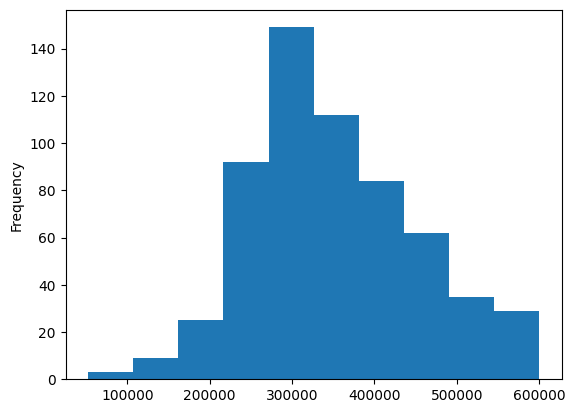

In [167]:
cleaned_df["Property price (USD)"].plot(kind="hist")

<Axes: xlabel='Property price (USD)'>

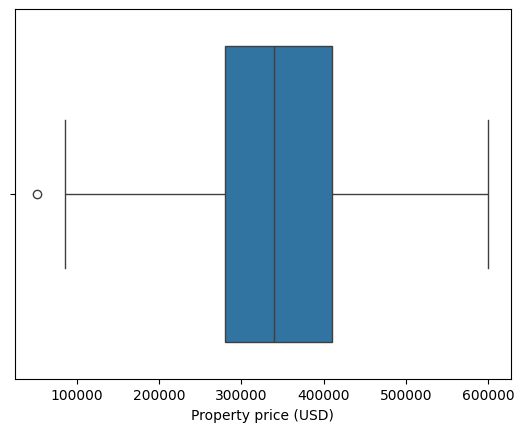

In [168]:
sns.boxplot(data=cleaned_df, x="Property price (USD)")

# House Locations

In [169]:
fig = px.scatter_mapbox(data_frame=cleaned_df, 
                        lat="Latitude", 
                        lon="Longitude",
                        mapbox_style="carto-positron")

fig.show()

C:\Users\kerom\AppData\Local\Temp\ipykernel_15152\2520171450.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# House Location Color by Price

In [170]:
fig = px.scatter_mapbox(data_frame=cleaned_df, 
                        lat="Latitude", 
                        lon="Longitude",
                        color="Property price (USD)",
                        hover_data=["Property price (USD)", "Zestimate (USD)", "City", "Living area", "Bedrooms", "Bathrooms"],
                        mapbox_style="carto-positron")

fig.show()

C:\Users\kerom\AppData\Local\Temp\ipykernel_15152\3089808353.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



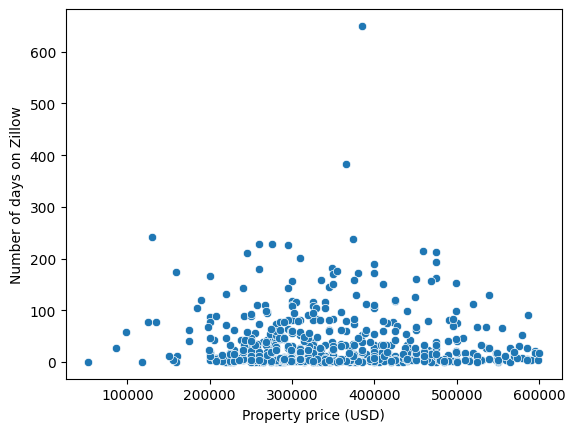

In [171]:
sns.scatterplot(data=cleaned_df, x="Property price (USD)", y="Number of days on Zillow")

plt.show()

# House Price by Bedrooms

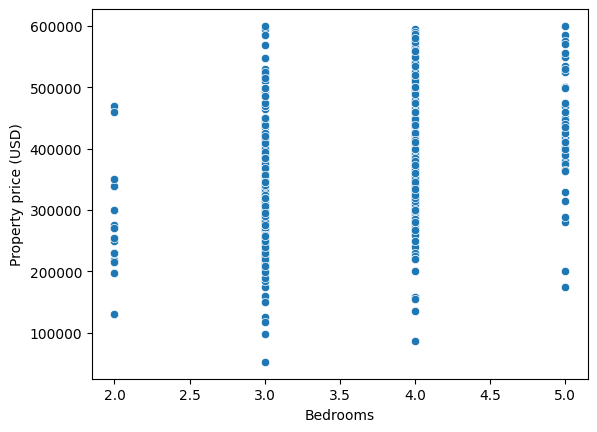

In [172]:
sns.scatterplot(data=cleaned_df,  x="Bedrooms", y="Property price (USD)")

plt.show()

# House Price by Bathrooms

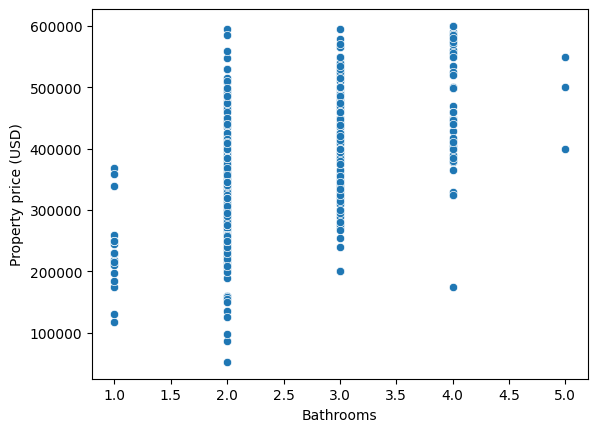

In [173]:
sns.scatterplot(data=cleaned_df,  x="Bathrooms", y="Property price (USD)")

plt.show()

# House Price by Living Area

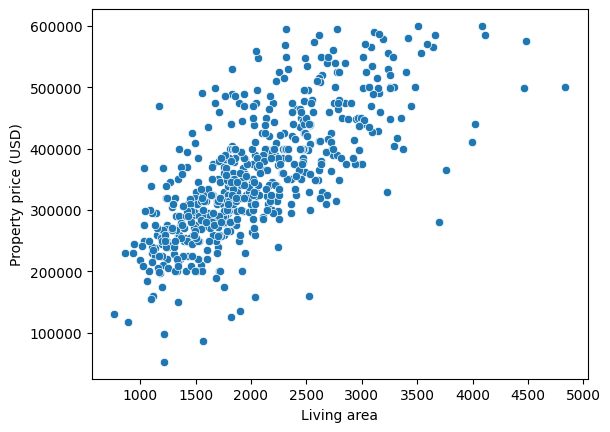

In [174]:
sns.scatterplot(data=cleaned_df,  x="Living area", y="Property price (USD)")

plt.show()

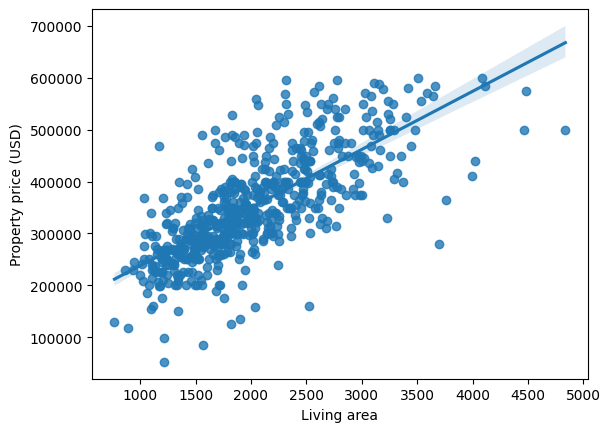

In [175]:
sns.regplot(data=cleaned_df,  x="Living area", y="Property price (USD)")

plt.show()

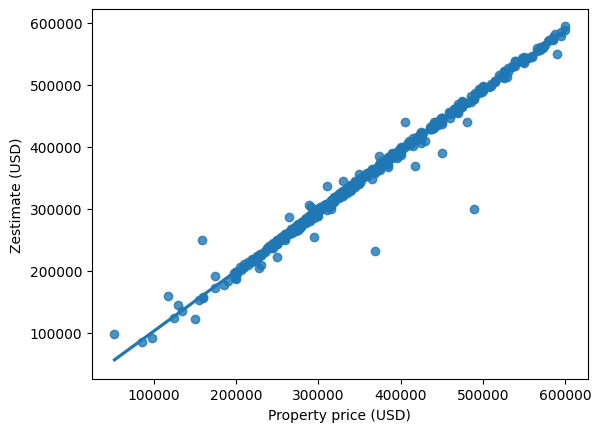

In [176]:
sns.regplot(data=cleaned_df, x="Property price (USD)", y="Zestimate (USD)")
plt.show()